# Redes Neurais Artificiais (ANNs)

são um pilar do aprendizado de máquina e do aprendizado profundo, inspiradas nas redes neurais biológicas dos cérebros humanos.

### Estrutura das ANNs

**1. Neurônios (Nós)**:

* Unidades básicas de uma ANN, semelhantes aos neurônios biológicos.
* Cada neurônio recebe entradas, processa-as e produz uma saída.

**2. Camadas**:

* Camada de Entrada: A primeira camada que recebe os dados de entrada.
* Camadas Ocultas: Camadas intermediárias onde ocorrem os cálculos e transformações de características.
* Camada de Saída: A camada final que produz a saída.

**3. Conexões (Pesos)**:

* Cada conexão entre neurônios tem um peso associado, representando a força da conexão.
* Os pesos são ajustados durante o treinamento para minimizar o erro.

## Funcionamento das ANNs

**Propagação Direta**:

* Os dados de entrada são alimentados na rede, passam pelas camadas e produzem uma saída.
* Cada neurônio calcula uma soma ponderada de suas entradas, aplica uma função de ativação e passa o resultado para a próxima camada.

**Funções de Ativação**:

* Introduzem não-linearidade no modelo, permitindo que ele aprenda padrões complexos.
* Funções de ativação comuns incluem Sigmoid, Tanh, ReLU (Rectified Linear Unit) e Softmax.

**Função de Perda**:

* Mede a diferença entre a saída prevista e a saída real.
* Funções de perda comuns incluem Erro Quadrático Médio (MSE) para tarefas de regressão e Perda de Entropia Cruzada para tarefas de classificação.

**Retropropagação**:

* O processo de ajustar os pesos para minimizar a perda.
* Envolve calcular o gradiente da função de perda em relação a cada peso e atualizar os pesos usando algoritmos de otimização como o Gradiente Descendente.

## Tipos de ANNs

1. **Redes Neurais Feedforward (FNNs)**:

* O tipo mais simples de ANN onde as conexões entre os nós não formam um ciclo.
* Usadas para tarefas como classificação de imagens e regressão.

2. **Redes Neurais Convolucionais (CNNs)**:

* Projetadas para processar dados estruturados em grade, como imagens.
* Usam camadas convolucionais para aprender hierarquias espaciais de características das imagens de entrada de forma automática e adaptativa.

3. **Redes Neurais Recorrentes (RNNs)**:

* Projetadas para dados sequenciais onde as entradas atuais estão relacionadas às anteriores.
* Incluem loops que permitem a persistência de informações, úteis para tarefas como modelagem de linguagem e previsão de séries temporais.

4. **Autoencoders**:

* Usados para aprendizado não supervisionado de codificações eficientes.
* Consistem em um codificador para comprimir a entrada em uma representação de espaço latente e um decodificador para reconstruir a entrada a partir dessa representação.



In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Churn_Modelling.csv")
data.shape

(10000, 14)

In [3]:
data.duplicated().sum()

0

In [4]:
# retirando as colunas que não fazem parte da analise
data = data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [5]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# transformando as variaveis categóricas em dummy (enconding)

data=pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)
data.replace({False:0,True:1},inplace=True)
data.head()

<ipython-input-6-ff28e43ce0cc>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({False:0,True:1},inplace=True)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# O resultado será algo como (n_samples, n_features),
# onde n_samples é o número de amostras e n_features é o número de características (features).
# no caso temos 12 features
data.shape

(10000, 12)

### Definir o Input Shape:

* O input shape será baseado no número de características dos dados. Se você tiver 20 características, por exemplo, o input shape será (20,).

In [13]:
X = data.drop(columns = ["Exited"])
y = data["Exited"]

In [14]:
train_inputs, test_inputs, train_output, test_output = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
print("train_inputs: ", train_inputs.shape)
print("test_inputs: ", test_inputs.shape)
print("train_output: ", train_output.shape)
print("test_output:", test_output.shape)

train_inputs:  (8000, 11)
test_inputs:  (2000, 11)
train_output:  (8000,)
test_output: (2000,)


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
train_inputs = scaler.fit_transform(train_inputs)
test_inputs = scaler.transform(test_inputs)

# Arquitetura da rede com 1 camada escondida

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

In [20]:
model = Sequential()
model.add(Input(shape=(11,)))  # Usar a camada Input para definir a forma de entrada
model.add(Dense(3, activation = "sigmoid")) # camada oculta
model.add(Dense(1, activation = "sigmoid")) # camada de saída

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss = "binary_crossentropy", optimizer = "Adam", metrics=['acc'])

In [23]:
history=model.fit(train_inputs,train_output, epochs = 20, validation_data=(test_inputs,test_output))

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.3379 - loss: 0.7379 - val_acc: 0.8035 - val_loss: 0.6127
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7986 - loss: 0.5888 - val_acc: 0.8035 - val_loss: 0.5210
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7926 - loss: 0.5153 - val_acc: 0.8035 - val_loss: 0.4769
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.7905 - loss: 0.4863 - val_acc: 0.8035 - val_loss: 0.4558
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7969 - loss: 0.4630 - val_acc: 0.8035 - val_loss: 0.4438
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.7965 - loss: 0.4514 - val_acc: 0.8035 - val_loss: 0.4353
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7930 - loss: 0.4486 - val_acc: 0.8035 - val_loss: 0.4284
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7951 - loss: 0.4391 - val_acc: 0.8035 - val_loss: 0.4233
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

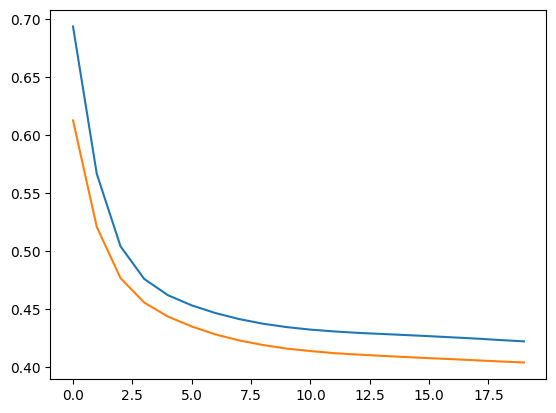

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

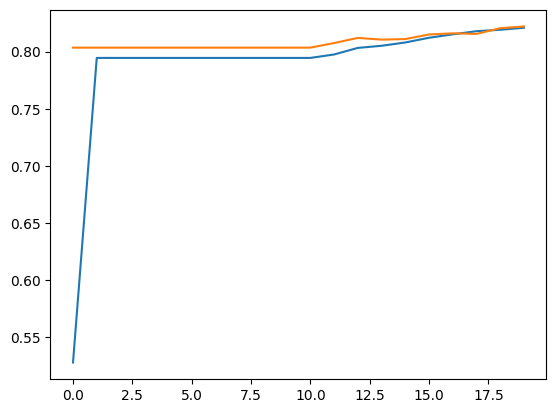

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

Para plotar a curva ROC (Receiver Operating Characteristic) usando o histórico de treinamento (`history`) de um modelo treinado com Keras, você vai precisar seguir algumas etapas:

1. **Obter as predições do modelo para os dados de teste**.
2. **Calcular as taxas de Falso Positivo (FPR), Verdadeiro Positivo (TPR)** e o **limiar de decisão**.
3. **Plotar a curva ROC**.

Abaixo está o passo a passo para gerar a curva ROC usando os dados de validação (test_inputs, test_output):

### Passo a passo para plotar a curva ROC:

1. **Importe as bibliotecas necessárias**:
   Você vai precisar das seguintes bibliotecas: `matplotlib` para os gráficos, `sklearn.metrics` para calcular os dados da curva ROC.

2. **Obtenha as predições do modelo**:
   O modelo deve prever probabilidades (para classificação binária) usando `model.predict()`.

3. **Calcule a curva ROC**:
   O `roc_curve` da biblioteca `scikit-learn` vai gerar os valores da taxa de verdadeiros positivos e falsos positivos para você.

4. **Calcule a AUC (Área Sob a Curva)**:
   A AUC quantifica o desempenho da curva ROC e pode ser calculada com `roc_auc_score`.

### Código:

```python
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Passo 1: Obtenha as predições do modelo para os dados de teste
y_pred_prob = model.predict(test_inputs)

# Passo 2: Calcule a curva ROC
fpr, tpr, thresholds = roc_curve(test_output, y_pred_prob)

# Passo 3: Calcule a AUC
roc_auc = auc(fpr, tpr)

# Passo 4: Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha diagonal (chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo (False Positive Rate)')
plt.ylabel('Verdadeiro Positivo (True Positive Rate)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
```

### Explicação:

1. **`model.predict(test_inputs)`**: Gera as probabilidades de saída do modelo para cada amostra de teste.
   
2. **`roc_curve(test_output, y_pred_prob)`**: Calcula as taxas de verdadeiros positivos (`tpr`), falsos positivos (`fpr`) e os limiares de decisão baseados nas predições do modelo.

3. **`auc(fpr, tpr)`**: Calcula a área sob a curva (AUC), que dá uma ideia de quão boa é a classificação.

4. **Plotagem**: A curva ROC é traçada com a taxa de falsos positivos no eixo X e a taxa de verdadeiros positivos no eixo Y. A linha diagonal representa a aleatoriedade.

### Observações:
- **`test_output`** deve conter as verdadeiras classes (rótulos) do conjunto de validação.
- **`y_pred_prob`** deve conter as probabilidades previstas pelo modelo (não as classes binárias). A função `predict()` retorna probabilidades entre 0 e 1 quando a função de ativação da camada de saída é `sigmoid` (no caso de uma classificação binária).


### Baseado na curva ROC para decidir o ratio

A linha de código
]


```
y_pred = np.where(y_log > 0.5, 1, 0)
```

* é usada para converter as previsões de probabilidade (y_log) em rótulos binários (0 ou 1). O limiar de 0.5 é escolhido com base na análise da Curva ROC (Receiver Operating Characteristic) para determinar o ponto de corte ideal que maximiza a separação entre as classes.

### Curva ROC e Escolha do Limiar:

* A Curva ROC é uma ferramenta gráfica que ilustra o desempenho de um modelo de classificação binária. Ela plota a taxa de verdadeiros positivos (sensibilidade) contra a taxa de falsos positivos (1 - especificidade) para diferentes valores de limiar.

### Passos para Escolher o Limiar:
* Calcular a Curva ROC: Para cada possível valor de limiar, calcular a taxa de verdadeiros positivos (TPR) e a taxa de falsos positivos (FPR).

### Analisar a Curva:
* A Curva ROC é traçada com TPR no eixo y e FPR no eixo x. Cada ponto na curva representa um par (TPR, FPR) para um determinado limiar.

### Área Sob a Curva (AUC):

* A AUC é uma métrica que resume a performance do modelo; quanto mais próximo de 1, melhor o modelo.


### Escolher o Limiar Ótimo:
* O ponto ideal na Curva ROC é aquele que maximiza a TPR e minimiza a FPR. Muitas vezes, o limiar de 0.5 é um bom ponto de partida, especialmente se as classes estão balanceadas.

### Por que 0.5?

* Equilíbrio: Um limiar de 0.5 é intuitivo porque divide as previsões em duas classes com base na probabilidade de 50%. Se a probabilidade prevista é maior que 0.5, a classe é 1; caso contrário, é 0.
* Curva ROC: Na prática, o limiar de 0.5 geralmente está próximo do ponto na Curva ROC onde a sensibilidade e a especificidade são equilibradas, especialmente em conjuntos de dados balanceados1.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


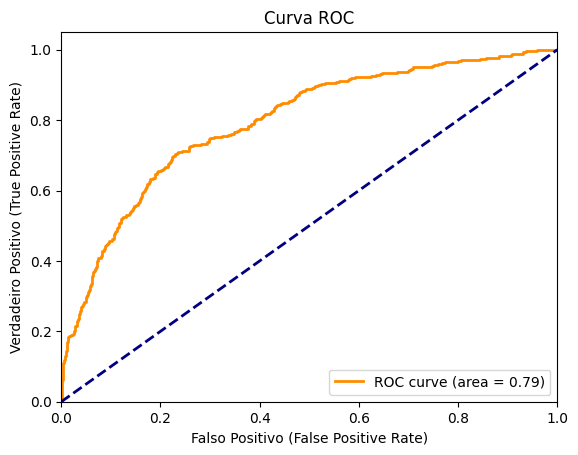

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Passo 1: Obtenha as predições do modelo para os dados de teste
y_pred_prob = model.predict(test_inputs)

# Passo 2: Calcule a curva ROC
fpr, tpr, thresholds = roc_curve(test_output, y_pred_prob)

# Passo 3: Calcule a AUC
roc_auc = auc(fpr, tpr)

# Passo 4: Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha diagonal (chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo (False Positive Rate)')
plt.ylabel('Verdadeiro Positivo (True Positive Rate)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


# Fine tunning
* alterando a função de ativação

In [ ]:
# Definir o modelo
model = Sequential()
model.add(Input(shape=(11,)))  # Usar a camada Input para definir a forma de entrada
model.add(Dense(11, activation='relu')) # camada oculta
model.add(Dense(1, activation='sigmoid'))  # Camada de saída

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 144 (576.00 B)

 Trainable params: 144 (576.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer = "Adam", metrics = ["accuracy"])

In [ ]:
history = model.fit(train_inputs, train_output, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6873 - loss: 0.6056 - val_accuracy: 0.7969 - val_loss: 0.4979
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7985 - loss: 0.4968 - val_accuracy: 0.8156 - val_loss: 0.4506
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8002 - loss: 0.4542 - val_accuracy: 0.8169 - val_loss: 0.4324
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8017 - loss: 0.4452 - val_accuracy: 0.8188 - val_loss: 0.4235
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8008 - loss: 0.4439 - val_accuracy: 0.8219 - val_loss: 0.4177
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8024 - loss: 0.4389 - val_accuracy: 0.8238 - val_loss: 0.4123
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8172 - loss: 0.4153 - val_accuracy: 0.8238 - val_loss: 0.4077
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8208 - loss: 0.4145 - val_accu

In [ ]:
y_log = model.predict(test_inputs)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
import matplotlib.pyplot as plt

### loss and train_loss plot

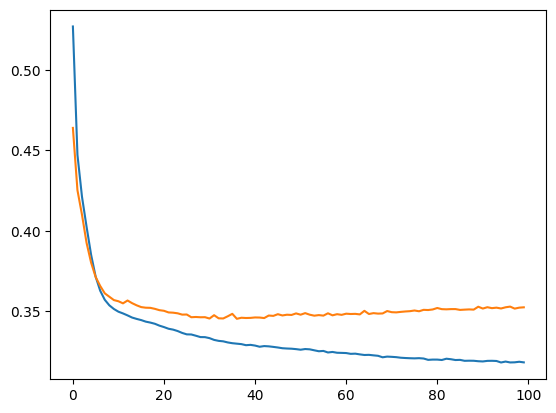

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

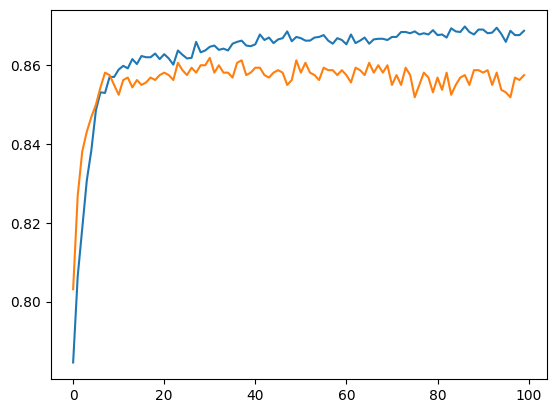

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])